In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [20]:
graphs=["simulated141","simulated191","simulated262","simulated296", "simulated490"]

ccted = [0,29,21,29,30,29,0,30,29,31,21,30,0,31,29,29,29,31,0,28,30,31,29,28,0]
time_ccted = [0.84,10.01,3.35,3.45,7.01,8.59,0.85,8.21,8.70,11.58,2.73,6.69,0.78,19.83,4.74,3.37,6.05,9.84,0.86,5.68,8.72,9.14,6.63,7.19,0.89]
gted = [0,29,21,29,30,29,0,30,29,31,21,30,0,31,29,29,29,31,0,28,30,31,29,28,0]
time_gted = [0.57,61.12,6.51,25.38,70.26,8.42,0.54,6.65,54.93,22.79,23.31,29.32,0.54,34.85,13.73,3.15,15.97,61.77,0.04,53.01,15.08,142.14,6.15,7.14,0.04]
idx = 0

with open("ilp_output_subtour.csv", "w") as ofile:
    ofile.write("g1,g2,ccted,gted,time_ccted_subtour,time_gted_subtour"+"\n")
    for i in range(5):
        for j in range(5):
            ofile.write(",".join([str(s) for s in [graphs[i],graphs[j],ccted[idx],gted[idx],time_ccted[idx],time_ccted[idx]+time_gted[idx]]])+"\n")
            idx+=1

In [21]:
sns.set(font_scale=1.2)
sns.set_style("ticks")

In [14]:
ilp_fname = "ilp_output_0501.csv"
ilp_subtour_fname = "ilp_output_subtour.csv"
ilp_iteration_fname = "ilp_output_iterations.csv"
lp_fname = "lp_output_0501.csv"

In [283]:
ilp_df_1 = pd.read_csv(ilp_fname, index_col=0)
ilp_subtour_df = pd.read_csv(ilp_subtour_fname)
ilp_iteration_df = pd.read_csv(ilp_iteration_fname)
lp_df = pd.read_csv(lp_fname, index_col=0)

In [284]:
ilp_df = ilp_df.set_index(["g1","g2"])
ilp_iteration_df = ilp_iteration_df.set_index(["g1","g2"])["iterations"]
ilp_subtour_df = ilp_subtour_df.set_index(["g1","g2"])[["time_ccted_subtour","time_gted_subtour"]]

In [290]:
ilp_joined = ilp_df.join(ilp_subtour_df)
ilp_joined = ilp_joined.join(ilp_iteration_df)

In [108]:

ilp_fname = "/home/yihangs/gtednotp/ilp_output_more_0502.csv"
lp_fname = "/home/yutongq/gtednewilp/ilp_output_more_lp_0502.csv"

In [109]:
lp_df =  pd.read_csv(lp_fname)
for i, row in lp_df.iterrows():
    suf1 = int(row["g1"].lstrip("simulated"))
    suf2 = int(row["g2"].lstrip("simulated"))
    if suf1 > suf2:
        lp_df.loc[i,"g1"] = row["g2"]
        lp_df.loc[i,"g2"] = row["g1"] 
        
ilp_df =  pd.read_csv(ilp_fname)
for i, row in ilp_df.iterrows():
    suf1 = int(row["g1"].lstrip("simulated"))
    suf2 = int(row["g2"].lstrip("simulated"))
    if suf1 > suf2:
#         print(suf1, suf2)
#         print(i,ilp_df.loc[i])
        
        tmp = row["g1"]
        ilp_df.loc[i,"g1"] = row["g2"]
        ilp_df.loc[i,"g2"] = row["g1"]
#         print(i,ilp_df.loc[i])
        

In [115]:

pearsonr(ilp_df["gted"],ilp_df["gted_time"])
pearsonr(ilp_df["gted"],ilp_df["ccted_time"])

(0.15327660442822413, 0.0347446114536379)

In [65]:
lp_df = lp_df.set_index(["g1","g2"])
ilp_df = ilp_df.set_index(["g1","g2"])
ilp_lp_join = ilp_df.join(lp_df, lsuffix="_ilp", rsuffix="_lp")
ilp_df = ilp_df[ilp_df["gted"] == ilp_df["ccted"]]

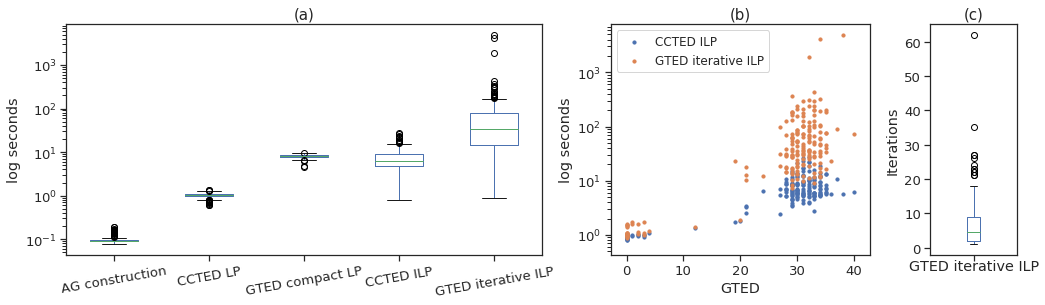

In [70]:
fig, axes = plt.subplots(1,3, sharey=False)

ilp_time_df = ilp_lp_join[["ag_time","ccted_time_lp","gted_time_lp","ccted_time_ilp","gted_time_ilp"]]
ilp_time_df.columns = ["AG construction","CCTED LP", "GTED compact LP", "CCTED ILP", "GTED iterative ILP" ]
axes[0] = ilp_time_df.plot.box(ax = axes[0])
# ilp_time_df.mean().to_frame().transpose()
axes[0].set_yscale("log")
axes[0].set_ylabel("log seconds")

ilp_lp_plot = ilp_lp_join[ilp_lp_join["gted_time_ilp"] < 10000]

axes[1].scatter(ilp_lp_plot["gted_ilp"], ilp_lp_plot["ccted_time_ilp"], s=10, label="CCTED ILP")
axes[1].scatter(ilp_lp_plot["gted_ilp"], ilp_lp_plot["gted_time_ilp"], s=10,  label="GTED iterative ILP")
axes[1].set_yscale("log")
axes[1].set_ylabel("log seconds")
ilp_df["iteration"].plot.box(ax=axes[2])
# axes[2].set_yscale("log")
axes[2].set_ylabel("Iterations")
axes[2].set_xlabel("GTED iterative ILP")

axes[0].set_position([0.1, 0.1, 0.55, 0.8])
axes[1].set_position([0.73, 0.1, 0.3, 0.8])
axes[2].set_position([1.1, 0.1, 0.1, 0.8])

axes[1].legend(fontsize=12)
axes[1].set_xlabel("GTED")

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 10)
# axes[2].legend(loc = "lower left")
# axes[2].set_xlabel("Edit distance")


# sns.boxplot(data=melt_df, x="variable", y="value", order=[ "GTED iterative ILP", "CCTED ILP"], hue="GTED = CCTED",ax=axes[1])
# axes[1].set_ylabel("a")

axes[0].set_title("(a)", fontsize=15)
axes[1].set_title("(b)", fontsize=15)
axes[2].set_title("(c)", fontsize=15)

for ax in axes.flatten():
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
axes[-1].xaxis.set_tick_params(labelbottom=False)

fig.set_size_inches(12,4)
fig.savefig("runtime_tcr.pdf", bbox_inches="tight")
# fig.tight_layout()

In [72]:
ilp_df[ilp_df["gted"] == ilp_df["ccted"]]

ccted  iteration  gted  edit_distance   gted_time  \
g1           g2                                                                
simulated303 simulated303    0.0          1   0.0              0    1.064536   
             simulated490   29.0          4  29.0             56   30.110288   
simulated279 simulated303   28.0          2  28.0             49   18.061379   
simulated207 simulated303   30.0          2  30.0             57   13.287633   
simulated303 simulated393   31.0          4  31.0             58   30.637788   
simulated191 simulated303   28.0          9  28.0             45   70.451612   
simulated167 simulated303   32.0          2  32.0             63   37.196175   
simulated141 simulated303   30.0         10  30.0             63   78.630227   
simulated287 simulated303   28.0          3  28.0             48   30.375351   
simulated280 simulated303   29.0         27  29.0             62  186.174586   
simulated303 simulated333   34.0          1  34.0             66   11.564906   
             simulated305   28.0         13  28.0             49  127.027162   
simulated187 simulated303   30.0          4  30.0             52   30.593081   
simulated25  simulated303   35.0          5  35.0             75   45.442229   
simulated256 simulated303   29.0          6  29.0             49   72.647793   
simulated303 simulated460   31.0          4  31.0             59   40.067811   
simulated296 simulated303   29.0          5  29.0             49   37.996359   
simulated303 simulated330   34.0          4  34.0             63   28.434890   
simulated262 simulated303   32.0          4  32.0             60   53.439019   
simulated490 simulated490    0.0          1   0.0              0    1.066020   
simulated207 simulated490   28.0          4  28.0             40   31.223823   
simulated393 simulated490   29.0          2  29.0             41   27.822783   
simulated191 simulated490   31.0         10  31.0             55  153.549419   
simulated167 simulated490   32.0         10  32.0             65   83.873367   
simulated141 simulated490   30.0          3  30.0             58   24.438347   
simulated287 simulated490   27.0         14  27.0             51   99.407053   
simulated280 simulated490   34.0          7  34.0             69   47.375073   
simulated333 simulated490   33.0         12  33.0             64  125.152608   
simulated187 simulated490   30.0         14  30.0             59   74.974414   
simulated25  simulated490   34.0          2  34.0             71   14.668594   
...                          ...        ...   ...            ...         ...   
simulated262 simulated333   24.0          2  24.0             40   12.444582   
simulated305 simulated305    0.0          2   0.0              0    1.512964   
simulated256 simulated305   21.0          8  21.0             24   18.165880   
simulated305 simulated460   30.0          3  30.0             58   21.110834   
simulated296 simulated305    4.0          1   4.0              4    1.154244   
simulated305 simulated330   33.0         14  33.0             58  160.786571   
simulated262 simulated305   31.0          3  31.0             49   35.131432   
simulated187 simulated187    0.0          1   0.0              0    1.027811   
             simulated256   29.0          6  29.0             44   34.831347   
             simulated296   31.0          9  31.0             45  211.235317   
             simulated330   35.0         11  35.0             63  198.151141   
             simulated262   30.0          2  30.0             53   13.243373   
simulated25  simulated25     0.0          1   0.0              0    0.945449   
             simulated256   35.0          6  35.0             74   40.092654   
             simulated460   33.0          5  33.0             71   34.265233   
             simulated296   35.0         10  35.0             74   74.947974   
             simulated330   35.0          6  35.0             72   33.725415   
             simulated262  

In [75]:

print(ilp_df[ilp_df["gted"] == ilp_df["ccted"]].mean())
print(lp_df[ilp_df["gted"] == ilp_df["ccted"]].max())


ccted            25.726190
iteration         6.821429
gted             25.726190
edit_distance    48.059524
gted_time        70.708174
ccted_time        7.397152
dtype: float64


/home/yutongq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [98]:
import pandas as pd
from collections import defaultdict

In [6]:
a = defaultdict(list,
            {'ccted': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
             'time_ccted': [0.059360504150390625,
              0.06261849403381348,
              0.0395050048828125,
              0.04368996620178223,
              0.062135934829711914,
              0.05669713020324707,
              0.06074357032775879,
              0.0894310474395752],
             'iteration': [6, 359, 11, 9, 9, 16, 7, 1808],
             'gted': [2.0, 4.0, 2.0, 2.0, 2.0, 3.0, 2.0, -1],
             'time_gted_it': [0.4407973289489746,
              494.5695426464081,
              0.43334341049194336,
              0.34682273864746094,
              0.5409121513366699,
              0.8931353092193604,
              0.2904787063598633,
              10154.440893173218],
             'gted2': [2.0, 4.0, 2.0, 2.0, 2.0, 3.0, 2.0, 5.0],
             'time_gted_compact': [0.7259290218353271,
              1.2265980243682861,
              0.3560645580291748,
              0.3132781982421875,
              0.5162830352783203,
              0.6434762477874756,
              0.35544729232788086,
              4.144577741622925]})

In [99]:
cycle_df = pd.read_csv("3cycle_output.csv")

In [83]:
# cycle_df.to_csv("3cycle_0501_output.csv")
cycle_df = pd.read_csv("3cycle_0501_output.csv")

In [100]:
cycle_df["gted - ccted"] = cycle_df["gted2"] - cycle_df["ccted"]

In [107]:
cycle_df.abs().groupby("gted - ccted").count()

,gted2,time_gted_compact,ccted,time_ccted,iteration,gted,time_gted_it
gted - ccted,,,,,,,
1.0,20,20,20,20,20,20,20
2.0,20,20,20,20,20,20,20
3.0,20,20,20,20,20,20,20
4.0,20,20,20,20,20,20,20
5.0,20,20,20,20,20,20,20


In [104]:
cycle_df[cycle_df["gted - ccted"] == 5].abs()

,gted2,time_gted_compact,ccted,time_ccted,iteration,gted,time_gted_it,gted - ccted
80,6.0,11.285471,1.0,0.104131,360.0,6.0,401.598861,5.0
81,6.0,4.775985,1.0,0.127256,652.0,5.0,1200.417872,5.0
82,6.0,5.853153,1.0,0.067108,614.0,6.0,1200.951961,5.0
83,6.0,0.376825,1.0,0.038190,731.0,5.0,1201.941608,5.0
84,5.0,8.813384,0.0,0.068158,545.0,4.0,1202.522637,5.0
85,6.0,5.337509,1.0,0.058108,651.0,6.0,1200.901412,5.0
86,6.0,7.802547,1.0,0.058783,749.0,5.0,1201.607487,5.0
87,5.0,1.489978,0.0,0.051034,83.0,5.0,18.627634,5.0
88,5.0,8.010054,0.0,0.059381,514.0,4.0,1200.069286,5.0
89,5.0,4.280933,0.0,0.064867,561.0,4.0,1200.387247,5.0


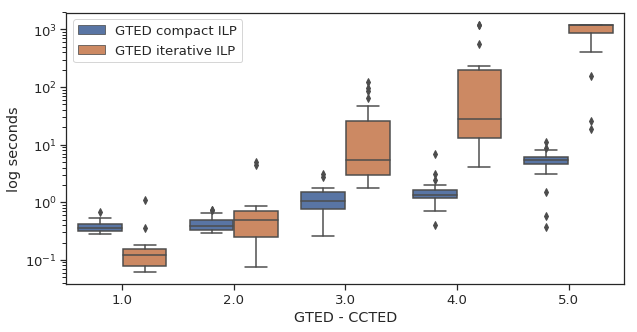

In [102]:
fig, ax = plt.subplots()

cycle_df1 = cycle_df[["gted - ccted", "time_gted_compact", "time_gted_it"]]
cycle_df1.columns = ["GTED - CCTED", "GTED compact ILP", "GTED iterative ILP"]
cycle_box_df = pd.melt(cycle_df1[ ["GTED - CCTED", "GTED compact ILP", "GTED iterative ILP"]], id_vars="GTED - CCTED")
sns.boxplot(data=cycle_box_df, x="GTED - CCTED", y="value", hue="variable", ax = ax)
ax.set_yscale("log")
ax.set_ylabel("log seconds")
ax.legend(title="")

fig.set_size_inches(10,5)
fig.savefig("runtime_3cycle.pdf", bbox_inches="tight")
# sns.scatterplot(data=cycle_df, x="gted - ccted", y="time_gted_compact")
# sns.scatterplot(data=cycle_df, x="gted - ccted", y="time_gted_it")

In [62]:
ilp_df2 = ilp_df[ilp_df["ccted"].astype(int)!=ilp_df["gted"].astype(int) ]
ilp_df2["label"] = "True"
ilp_df3 = ilp_df[ilp_df["ccted"].astype(int)==ilp_df["gted"].astype(int) ]
ilp_df3["label"] = "False"

df = pd.concat([ilp_df2, ilp_df3])

/home/yutongq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/yutongq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [63]:
# fig, ax = plt.subplots(1)
df = df[["label","gted_time","ccted_time"]]
df.columns = ["GTED = CCTED", "GTED iterative ILP", "CCTED ILP"]
melt_df = pd.melt(df, id_vars=["GTED = CCTED"])
sns.boxplot(data=melt_df, x="variable", y="value", order=[ "GTED iterative ILP", "CCTED ILP"], hue="GTED = CCTED",ax=axes)
# ax.set_yscale("log")
# ax.set_ylabel("ILP runtime (log seconds)")
# ax.set_xlabel("")
# add_stat_annotation(ax, data=melt_df, x="variable", y="value", order=["ccted_time", "gted_time"], hue="label",
#                     box_pairs=[(("gted_time", "equal"), ("gted_time", "unequal")), (("ccted_time", "equal"), ("ccted_time", "unequal"))],
#                     test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [66]:
axes.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'

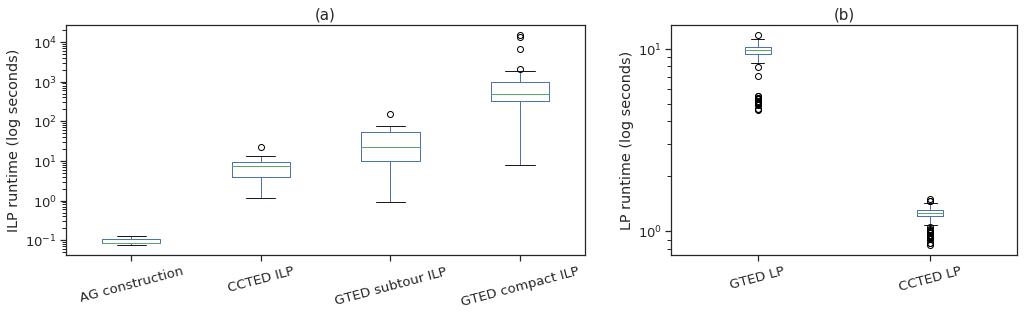

In [303]:
fig, axes = plt.subplots(1,2)

ilp_time_df = ilp_joined[["time_ag", "time_ccted","time_gted_subtour", "time_gted"]]
ilp_time_df.columns = ["AG construction", "CCTED ILP", "GTED subtour ILP", "GTED compact ILP" ]
axes[0] = ilp_time_df.plot.box(ax = axes[0])
# ilp_time_df.mean().to_frame().transpose()
axes[0].set_yscale("log")
axes[0].set_ylabel("ILP runtime (log seconds)")


lp_time_df = lp_df[["time_gted", "time_ccted"]]
lp_time_df.columns = ["GTED LP", "CCTED LP"]
axes[1] = lp_time_df.plot.box(ax = axes[1])
# ilp_time_df.mean().to_frame().transpose()
axes[1].set_yscale("log")
axes[1].set_ylabel("LP runtime (log seconds)")

axes[0].set_title("(a)", fontsize=15)
axes[1].set_title("(b)", fontsize=15)

axes[0].set_position([0.1, 0.1, 0.6, 0.8])
axes[1].set_position([0.8, 0.1, 0.4, 0.8])

axes[0].tick_params(axis='x', labelrotation=15)
axes[1].tick_params(axis='x', labelrotation=15)

# fig.tight_layout(w_pad=0.05, h_pad=0.1)
fig.set_size_inches(12,4)

fig.savefig("runtime.pdf", bbox_inches="tight")

In [301]:
ilp_joined.mean()

edit_distance           40.320000
gted                    22.960000
ccted                   22.960000
time_ag                  0.094207
time_gted             1924.448064
time_ccted               7.273626
time_ccted_subtour       6.229200
time_gted_subtour       32.765600
iterations               4.320000
dtype: float64

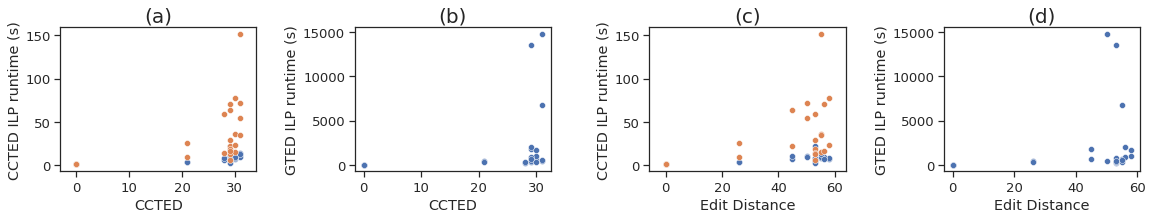

In [277]:
sns.set(font_scale=1.2)
sns.set_style("ticks")

fig,axes = plt.subplots(1,4)

sns.scatterplot(data=ilp_joined, x="ccted", y="time_ccted", ax=axes[0])
sns.scatterplot(data=ilp_joined, x="ccted", y="time_gted", ax=axes[1])
sns.scatterplot(data=ilp_joined, x="edit_distance", y="time_ccted", ax=axes[2])
sns.scatterplot(data=ilp_joined, x="edit_distance", y="time_gted", ax=axes[3])
sns.scatterplot(data=ilp_joined, x="ccted", y="time_gted_subtour", ax=axes[0])
sns.scatterplot(data=ilp_joined, x="edit_distance", y="time_gted_subtour", ax=axes[2])

axes[0].set_xlabel("CCTED")
axes[1].set_xlabel("CCTED")
axes[2].set_xlabel("Edit Distance")
axes[3].set_xlabel("Edit Distance")

axes[0].set_ylabel("CCTED ILP runtime (s)")
axes[1].set_ylabel("GTED ILP runtime (s)")
axes[2].set_ylabel("CCTED ILP runtime (s)")
axes[3].set_ylabel("GTED ILP runtime (s)")


axes[0].set_title("(a)", fontsize=20)
axes[1].set_title("(b)", fontsize=20)
axes[2].set_title("(c)", fontsize=20)
axes[3].set_title("(d)", fontsize=20)

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.2)
# plt.tight_layout(w_pad=0.05)
fig.set_size_inches(15,2)
fig.savefig("correlation.pdf", bbox_inches="tight")

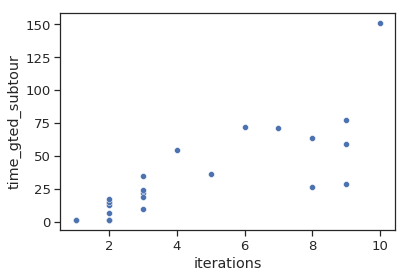

In [291]:
sns.scatterplot(data=ilp_joined, x="iterations", y="time_gted_subtour")

In [218]:
print("corr (ed, ccted_time):", pearsonr(ilp_df["edit_distance"], ilp_df["time_ccted"]))
print("corr (ccted, ccted_time):", pearsonr(ilp_df["ccted"], ilp_df["time_ccted"]))

corr (ed, ccted_time): (0.688168950100688, 0.00014334090097475527)
corr (ccted, ccted_time): (0.6916646405571348, 0.00012838304516071618)


In [179]:
ilp_df = ilp_df.set_index(["g1","g2"])

In [180]:
lp_df = lp_df.set_index(["g1","g2"])

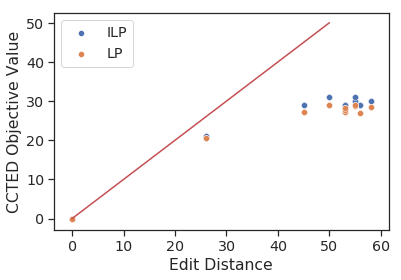

In [201]:
joined = ilp_df.join(lp_df, lsuffix="_ilp", rsuffix="_lp")
sns.scatterplot(data=joined, x="edit_distance_ilp", y="ccted_ilp", label="ILP")
sns.scatterplot(data=joined, x="edit_distance_ilp", y="ccted_lp", label="LP")
plt.plot([0,50],[0,50],color="r")
plt.ylabel("CCTED Objective Value")
plt.xlabel("Edit Distance")

plt.savefig("ccted_ed_relation.pdf")